# Предсказание стоимости автотранспорта с помощью методов анализа данных

Транспортная отрасль входит в пятерку отраслей, в которых методы больше всего используют искусственный интеллект и анализ данных. Современные автомобили имеют множество интеллектуальных систем, которые помогают водителям как непосредственно во время вождения, так и в задачах использования встроенного мультимедиа. Однако алгоритмы анализа данных можно применять и в других аспектах, связанных с автомобилями, например, для предсказания стоимости автомобиля, которая будет основана на множестве характеристик транспортного средства.

На стоимость подержанного автомобиля влияет множество факторов, среди которых выделяют несколько основных:

- Марка автомобиля
- Тип трансмиссии
- Привод автомобиля
- Год выпуска
- Кузов автомобиля
- Состояние салона
- Техническое состояние (включает в себя много отдельных характеристик)
- Пробег
- Дополнительные технологии

Сумма всех факторов создают большую сложность для простого пользователя авто при продаже, ведь учитывая весь спектр особенностей своего транспортного средства необходимо назначить правильную стоимость. Поэтому в этой работе проводится определение класса автомобиля (бюджетный, средний, дорогой) с помощью методов машинного обучения).

Для проведения данного исследования был взят датасет "Used Cars Dataset (CarDekho)". Ссылка на датасет: https://www.kaggle.com/datasets/sukritchatterjee/used-cars-dataset-cardekho

# Этап №1. Получение и предобработка данных

Для начала необходимо подключить все необходимые библиотеки для работы. 

1. Pandas - используется для работы с данными в более удобном формате - DataFrame и все его методы 
2. NumPy - для числовых операций с данными
3. matplotlib - для графического анализа выборки и построения графиков с результатами
4. time - для сравнения времени, затраченного на работу моделей
5. sklearn - для использования самих моделей и необходимых преобразований данных 
6. seaborn - для построения матриц ошибок

In [1]:
# data working
import numpy as np
import pandas as pd

# analysis
import matplotlib.pyplot as plt
import time
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns

# prepare data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [66]:
df = pd.read_csv("archive/cars_details_merges.csv", low_memory=False)
df.shape

(37814, 140)

С помощью функции read_csv мы получили все данные из датасета и сохранили их в переменную df. Наш датасет имеет 140 столбцов и 37814 записей. Однако для работы не нужны все 140 столбцов, поэтому нужно отобрать только необходимые из них. А также используем вспомогательный датасет для того, чтобы получить стоимости автомобилей.

In [67]:
df = df[['myear', 
         'bt', 
         'tt', 
         'ft',
         'km',
         'oem',
         'Displacement',
         'Gear Box',
         'Drive Type',
         'Seating Capacity',
         'utype',
         'No of Cylinder',
         'Values per Cylinder',
         'Turbo Charger',
         'Color'
         ]]

supp_df = pd.read_csv("archive/cars_data_clean.csv")
df['listed_price'] = supp_df['listed_price']

df.head()

,myear,bt,tt,ft,km,oem,Displacement,Gear Box,Drive Type,Seating Capacity,utype,No of Cylinder,Values per Cylinder,Turbo Charger,Color,listed_price
0,2016,Hatchback,Manual,CNG,"69,162",Maruti,998.0,5 Speed,FWD,5.0,Dealer,3.0,4.0,No,Silver,370000.0
1,2015,Hatchback,Manual,CNG,"45,864",Maruti,998.0,5 Speed,FWD,5.0,Dealer,3.0,4.0,No,Grey,365000.0
2,2015,Sedan,Manual,CNG,"81,506",Honda,1198.0,5 Speed,FWD,5.0,Dealer,4.0,4.0,No,Silver,421000.0
3,2013,Hatchback,Manual,CNG,"1,15,893",Maruti,998.0,5 Speed,FWD,5.0,Dealer,3.0,4.0,No,Silver,240000.0
4,2022,MUV,Manual,CNG,"18,900",Maruti,1462.0,5-Speed,2WD,7.0,Dealer,4.0,4.0,NaN,White,1175000.0


Теперь датафрейм имеет 15 колонок, однако данные необходимо представить в том виде, в котором с ними можно будет работать. В первую очередь необходимо переименовать колонки.

In [68]:
len(df.Color.unique())

799

In [4]:
df = df.rename(columns={'myear': "ModelYear",
            'bt': 'BodyType',
            'tt': "TransmissionType",
            'ft': 'FuelType',
            'km': 'KmMileage',
            'oem': 'Brand',
            'Displacement': 'Clearance',
            'Gear Box': 'GearNumber',
            'Drive Type': 'DriveType',
            'Seating Capacity': 'SeatsNumber',
            'listed_price': 'ListedPrice',
            'utype': "SellerType",
            'No of Cylinder': "CylinderNumber",
            'Values per Cylinder': 'ValvesNumber',
            'Turbo Charger': 'TurboCharger'
           })
df.head()

,ModelYear,BodyType,TransmissionType,FuelType,KmMileage,Brand,Clearance,GearNumber,DriveType,SeatsNumber,SellerType,CylinderNumber,ValvesNumber,TurboCharger,ListedPrice
0,2016,Hatchback,Manual,CNG,"69,162",Maruti,998.0,5 Speed,FWD,5.0,Dealer,3.0,4.0,No,370000.0
1,2015,Hatchback,Manual,CNG,"45,864",Maruti,998.0,5 Speed,FWD,5.0,Dealer,3.0,4.0,No,365000.0
2,2015,Sedan,Manual,CNG,"81,506",Honda,1198.0,5 Speed,FWD,5.0,Dealer,4.0,4.0,No,421000.0
3,2013,Hatchback,Manual,CNG,"1,15,893",Maruti,998.0,5 Speed,FWD,5.0,Dealer,3.0,4.0,No,240000.0
4,2022,MUV,Manual,CNG,"18,900",Maruti,1462.0,5-Speed,2WD,7.0,Dealer,4.0,4.0,NaN,1175000.0


Теперь проверим записи на наличие нулевых значений.

In [5]:
df.isnull().sum()

ModelYear              0
BodyType              19
TransmissionType       0
FuelType               0
KmMileage              0
Brand                  0
Clearance             53
GearNumber           407
DriveType           4496
SeatsNumber           18
SellerType             0
CylinderNumber       143
ValvesNumber         228
TurboCharger        2176
ListedPrice            1
dtype: int64

В нескольких колонках встречаются нулевые значения, однако, сейчас мы не можем их убрать, так как при удалении записей потеряется достаточно большое количество данных. Поэтому в первую очередь качественные характеристики необходимо перевести в числовой вид.

Переведем в числовой вид кузов автомобиля.

In [6]:
label_encode = {"BodyType":
                    {
                        "Hatchback": 0,
                        "Sedan": 1,
                        "MUV": 2,
                        "Minivans": 3,
                        "Pickup Trucks": 4,
                        "SUV": 5, 
                        "Luxury Vehicles": 6,
                        "Convertibles": 7,
                        "Coupe": 8,
                        "Wagon": 9,
                        "Hybrids": 10
                     }}
df.replace(label_encode,inplace=True)

Переведем в числовой вид тип трансмиссии.

In [7]:
label_encode = {
                "TransmissionType":
                    {
                        "Manual": 0,
                        "Automatic": 1
                    }}
df.replace(label_encode,inplace=True)

Переведем в числовой вид тип используемого топлива.

In [8]:
label_encode = {
                "FuelType":
                    {
                        "CNG": 0,
                        "LPG": 1,
                        "Electric": 2,
                        "Diesel": 3,
                        "Petrol": 4
                    }}
df.replace(label_encode,inplace=True)

Переведем в числовой вид привод автомобиля.

In [9]:
label_encode = {
                "DriveType":
                    {
                        "FWD": 0,
                        "RWD": 1,
                        "AWD": 2,
                        "2WD": 3,
                        "Two Wheel Drive": 3, 
                        "FWD ": 0,
                        "2 WD": 3,
                        "4WD": 2,
                        "4 WD": 2,
                        "Front Wheel Drive": 0,
                        "All Wheel Drive": 2,
                        "4X2": 3,
                        "2wd": 3, 
                        "Four Whell Drive": 2,
                        "Rear Wheel Drive with ESP": 1,
                        "All-wheel drive with Electronic Traction": 3,
                        "Rear-wheel drive with ESP": 1,
                        "Permanent all-wheel drive quattro": 2,
                        "Two Whhel Drive": 3,
                        "4x4": 2,
                        "4X4": 2,
                        "4x2": 3,
                        "RWD(with MTT)": 1,
                        "3": 3
                    }}
df.replace(label_encode,inplace=True)

Переведем в числовой вид марку автомобиля.

In [10]:
label_encode = {
                "Brand":
                    {
                        'Maruti': 0,
                        'Honda': 1,
                        'Hyundai': 2,
                        'Tata': 3,
                        'Toyota': 4,
                        'Bajaj': 5,
                        'Mahindra': 6,
                        'Chevrolet': 7,
                        'MG': 8,
                        'Mercedes-Benz': 9,
                        'Mini': 10,
                        'Renault': 11,
                        'Nissan': 12,
                        'Datsun': 13,
                        'Kia': 14, 
                        'Force': 15,
                        'ICML': 16, 
                        'Ashok Leyland': 17,
                        'BMW': 18, 
                        'Volvo': 19,
                        'Audi': 20, 
                        'Isuzu': 21,
                        'Porsche': 22, 
                        'Jaguar': 23, 
                        'Lamborghini': 24,
                        'Ford': 25, 
                        'Ferrari': 26,
                        'DC': 27, 
                        'Bentley': 28,
                        'Aston Martin': 29,
                        'Volkswagen': 30, 
                        'Skoda': 31,
                        'Jeep': 32, 
                        'Fiat': 33, 
                        'Land Rover': 34,
                        'Mitsubishi': 35,
                        'Mahindra Ssangyong': 36,
                        'Mahindra Renault': 37, 
                        'Citroen': 38, 
                        'Hindustan Motors': 39, 
                        'Premier': 40,
                        'Rolls-Royce': 41, 
                        'Opel': 42,
                        'Hummer': 43,
                        'Maserati': 44,
                        'Lexus': 45
                    }}
df.replace(label_encode,inplace=True)

Переведем в числовой вид ступенчатость коробки передач.

In [11]:
label_encode = {
                "GearNumber":
                    {
                        '5 Speed': 5,
                        '5 Speed ': 5,
                        '5-Speed': 5,
                        'Five Speed Manual Transmission': 5,
                        '4 Speed': 4,
                        '6 Speed': 6,
                        '5 Speed+1(R)': 5,
                        'Fully Automatic': 1,
                        'Single Speed Automatic': 1,
                        'Single speed reduction gear': 1,
                        'Direct Drive': 1,
                        'Single-speed transmission': 1,
                        'Single Speed': 1,
                        '7 Speed 9G-Tronic automatic': 7,
                        '6-Speed': 6,
                        '8-Speed': 8,
                        '4-Speed': 4,
                        '6-Speed iMT': 6,
                        '7-Speed DCT': 7,
                        '8 Speed': 8,
                        '8 Speed Sport': 8,
                        'Six Speed  Gearbox': 6,
                        '5 Speed Forward, 1 Reverse': 5,
                        '5 Speed,5 Forward, 1 Reverse': 5,
                        '7 Speed': 7,
                        '9 Speed': 9,
                        'AMG Speedshift 9G TCT Automatic': 9,
                        '6 Speed Automatic': 6,
                        '8-speed': 8,
                        '9G-TRONIC': 9,
                        '8-speed tiptronic': 8,
                        'E-CVT': 1,
                        '6 Speed with Sequential Shift': 6,
                        'CVT': 1,
                        '5-Speed ': 5,
                        '6 Speed ': 6,
                        '4 Speed ': 4,
                        '5 Speed Manual': 5,
                        '7 Speed CVT': 7,
                        '6 Speed iMT': 6,
                        '5 speed': 5,
                        '6 Speed MT': 6,
                        '7-Speed': 7,
                        '10 Speed': 10,
                        '10 speed': 10,
                        '5 Gears ': 5,
                        '7 Speed DSG': 7,
                        '7-Speed DSG': 7,
                        '5 Speed Manual Transmission': 5,
                        'Six Speed Manual Transmission': 6,
                        'Six Speed Automatic Transmission': 6,
                        '6-speed': 6,
                        '5-speed': 5,
                        '7-speed': 7,
                        '7-speed DSG': 7,
                        'Six Speed Manual': 6,
                        '7 Speed 7G-DCT': 7,
                        '7G DCT 7-Speed Dual Clutch Transmission ': 7,
                        '9 speed Tronic': 9,
                        '8-Speed DCT': 8,
                        '7G-DCT': 7,
                        '9G TRONIC': 9,
                        '9G-TRONIC automatic': 9,
                        '9-speed': 9,
                        'AMG SPEEDSHIFT DCT 8G': 8,
                        '7G-TRONIC Automatic Transmission': 7,
                        'AMG 7-SPEED DCT': 7,
                        '8-Speed Steptronic': 8,
                        '8-Speed ': 8,
                        '7-Speed Steptronic': 7,
                        '8 Speed ': 8,
                        'Automatic Transmission': 1,
                        '8-Speed Steptronic Sport Automatic Transmission': 8,
                        '8-Speed Automatic Transmission': 8,
                        'IVT': 1,
                        '7 Speed DCT': 7,
                        '6-Speed IVT': 6,
                        '6-Speed AT': 6,
                        '7-Speed S-Tronic ': 7,
                        '8 Speed Tiptronic': 8,
                        '7-Speed S-Tronic': 7,
                        '7-Speed S tronic': 7,
                        '7-speed Stronic': 7,
                        '7 Speed S tronic': 7,
                        '7 Speed ': 7,
                        '7 Speed S Tronic': 7,
                        '8 Speed Multitronic': 8,
                        '6-speed DCT': 6,
                        '8 Speed CVT': 8,
                        '8 speed': 8,
                        '6-speed CVT': 6,
                        '6-Speed DCT': 6,
                        '9-Speed': 9,
                        '9 -speed': 9,
                        'Five Speed Manual Transmission Gearbox': 5,
                        'Five Speed': 5,
                        '5 speed manual': 5,
                        'Five Speed Manual': 5,
                        '8': 8,
                        '6-Speed Automatic': 6,
                        '9-speed automatic': 9,
                        'Six Speed Automatic Gearbox': 6,
                        '6 Speed Geartronic': 6,
                        'Six Speed Geartronic, Six Speed Automati': 6,
                        '8Speed': 8,
                        '8-speed automatic': 8,
                        '6 speed automatic': 6,
                        'Six Speed Manual with Paddle Shifter': 6,
                        '6': 6,
                        '5': 5,
                        '6 Speed AT': 6,
                        '8 Speed Tip Tronic S': 8,
                        '7-speed PDK': 7,
                        '7 Speed dual clutch transmission': 7,
                        '5 Speed CVT': 5,
                        '6-Speed`': 6,
                        '7-speed DCT': 7,
                        'AGS': 1,
                        '5 Speed AT+ Paddle Shifters': 5,
                        'iMT': 1,
                        '6-speed AutoSHIFT': 6,
                        '6-Speed IMT': 6,
                        '5-Speed`': 5,
                        '5 Manual': 5,
                        '6 speed ': 6,
                        '6 Speed IMT': 6,
                        '6 Speed IVT': 6,
                        '6-speed IVT': 6,
                        '5 - Speed': 5,
                        '7 speed': 7,
                        'Mercedes Benz 7 Speed Automatic': 7,
                        'eCVT': 1
                    }}
df.replace(label_encode,inplace=True)

Переведём в числовой вид тип продавца

In [12]:
label_encode = {
    "SellerType":
        {
            "Dealer": 0,
            "Individual": 1
        }}
df.replace(label_encode,inplace=True)

Переведём в числовой вид наличие турбонаддува

In [13]:
label_encode = {
    "TurboCharger":
        {
            "No": 0,
            "Yes": 1,
            'Twin': 1,
            'no': 0,
            'yes': 1,
            'twin': 1,
            'Turbo': 1,
            'YES': 1,
            'NO': 0
        }}
df.replace(label_encode,inplace=True)

Переведем в числовой вид пробег автомобиля.

In [14]:
KmMileage = pd.Series([int(m.replace(",", "")) for m in list(df.KmMileage) if isinstance(m, str)])
df.KmMileage = KmMileage

Переведем в рубли стоимость автомобиля и выведем результат.

In [15]:
df.ListedPrice = df.ListedPrice * 1.08
df.head()

,ModelYear,BodyType,TransmissionType,FuelType,KmMileage,Brand,Clearance,GearNumber,DriveType,SeatsNumber,SellerType,CylinderNumber,ValvesNumber,TurboCharger,ListedPrice
0,2016,0.0,0,0,69162,0,998.0,5.0,0.0,5.0,0,3.0,4.0,0.0,399600.0
1,2015,0.0,0,0,45864,0,998.0,5.0,0.0,5.0,0,3.0,4.0,0.0,394200.0
2,2015,1.0,0,0,81506,1,1198.0,5.0,0.0,5.0,0,4.0,4.0,0.0,454680.0
3,2013,0.0,0,0,115893,0,998.0,5.0,0.0,5.0,0,3.0,4.0,0.0,259200.0
4,2022,2.0,0,0,18900,0,1462.0,5.0,3.0,7.0,0,4.0,4.0,NaN,1269000.0


Заполним нулевые значения на средние значения по столбцу и приведем к целым числам там, где это необходимо.

In [16]:
df.fillna(df.mean(), inplace=True)
df = df.astype(int)
df.head()

,ModelYear,BodyType,TransmissionType,FuelType,KmMileage,Brand,Clearance,GearNumber,DriveType,SeatsNumber,SellerType,CylinderNumber,ValvesNumber,TurboCharger,ListedPrice
0,2016,0,0,0,69162,0,998,5,0,5,0,3,4,0,399600
1,2015,0,0,0,45864,0,998,5,0,5,0,3,4,0,394200
2,2015,1,0,0,81506,1,1198,5,0,5,0,4,4,0,454680
3,2013,0,0,0,115893,0,998,5,0,5,0,3,4,0,259200
4,2022,2,0,0,18900,0,1462,5,3,7,0,4,4,0,1269000


## Этап №2. Поиск выбросов

Теперь все данные приведены к цифровому виду и с ними можно будет работать. Но сначала необходимо проверить выборку на выбросы. Для этого построим графики и визуально оценим столбцы датафрейма на выбивающиеся значения.

Сначала проверим год выпуска автомобиля.

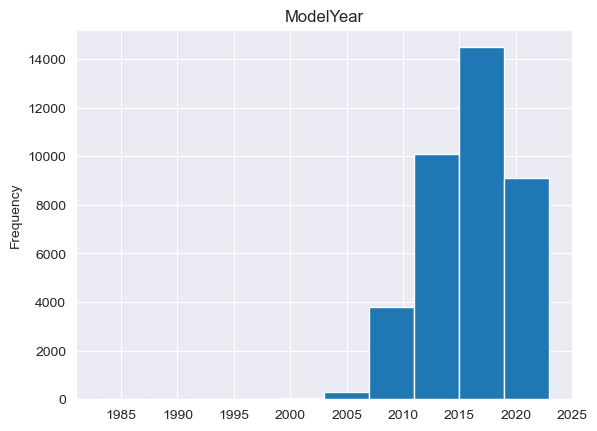

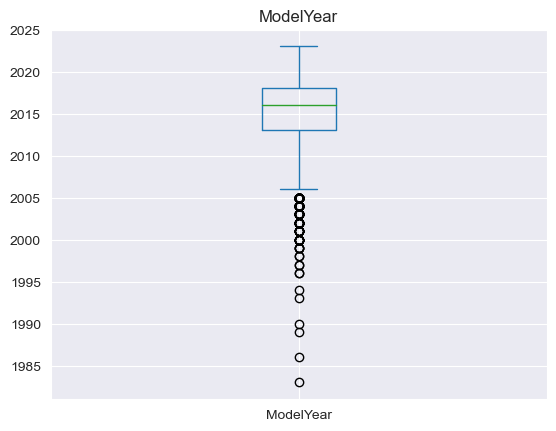

In [17]:
df.ModelYear.plot(kind='hist')
plt.title(f'ModelYear')
plt.show()

df.ModelYear.plot(kind='box')
plt.title(f'ModelYear')
plt.show()

По графикам видно, что относительно общего количества записей очень мало тех, в которых год выпуска автомобиля раньше 2010. Убедимся в этом, посмотрев количество таких записей и найдя точный год, раньше которого данные можно не принимать в выборку.

In [18]:
print(len(df[df.ModelYear < 2005]))
print(len(df[df.ModelYear < 2006]))
print(len(df[df.ModelYear < 2007]))
print(len(df[df.ModelYear < 2008]))
print(len(df[df.ModelYear < 2009]))
print(len(df[df.ModelYear < 2010]))

146
224
343
542
1241
2467


Видим, что можно удалить записи, где год меньше 2009.

In [19]:
df = df[df.ModelYear >= 2009]

Далее перейдем к типу кузова.

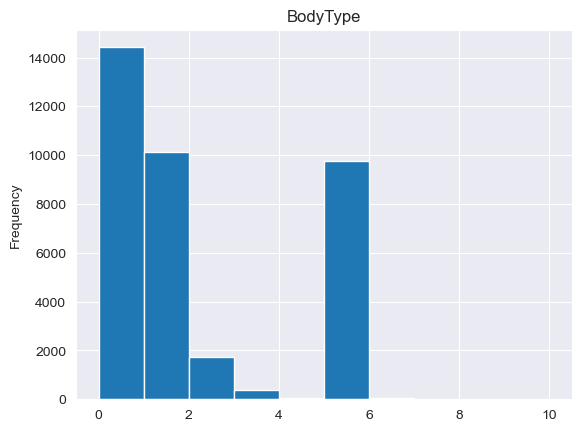

In [20]:
df.BodyType.plot(kind='hist')
plt.title(f'BodyType')
plt.show()

По графику видно, что адекватное количество данных присутствует об авто с типом кузова, обозначенным как 0, 1, 2 и 5. Остальные данные можно удалить из выборки, приняв их за выбросы.

In [21]:
df = df[(df.BodyType == 5) | (df.BodyType < 3)]

Далее перейдем к проверке типа трансмиссии.

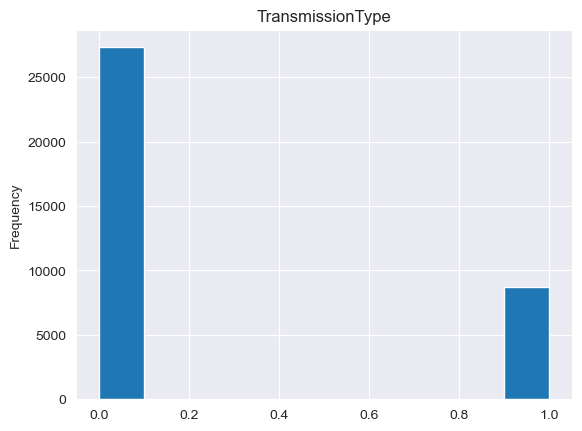

In [22]:
df.TransmissionType.plot(kind='hist')
plt.title(f'TransmissionType')
plt.show()

В данном столбце выбросов не обнаружено, а значит можно перейти к типу топлива.

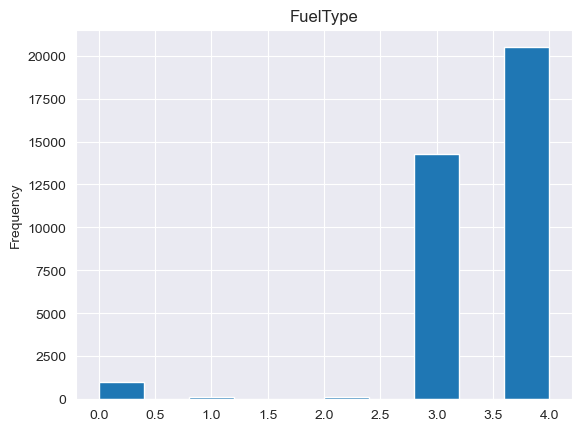

In [23]:
df.FuelType.plot(kind='hist')
plt.title(f'FuelType')
plt.show()

Мы видим, что популярностью в данной выборке пользуются только дизельные и бензиновые автомобили, а значит, остальные данные можно принять за выбросы.

In [24]:
df = df[df.FuelType > 2]

Проверим пробег автомобилей.

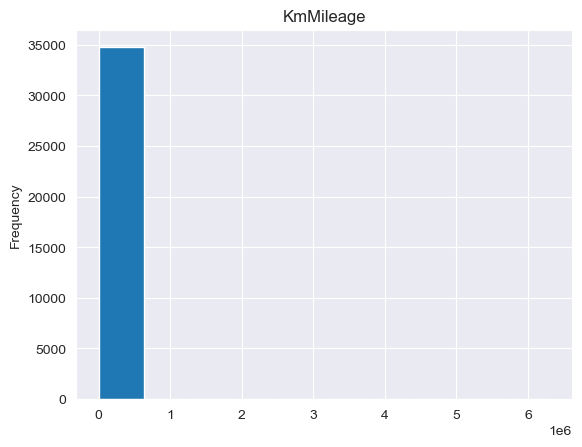

In [25]:
df.KmMileage.plot(kind='hist')
plt.title(f'KmMileage')
plt.show()

In [26]:
print(len(df[df.KmMileage > 600000]))
print(len(df[df.KmMileage > 500000]))
print(len(df[df.KmMileage > 400000]))
print(len(df[df.KmMileage > 300000]))
print(len(df[df.KmMileage > 200000]))
print(len(df[df.KmMileage > 180000]))

11
14
19
36
247
417


Видим, что можно смело удалять записи, где пробег превосходит 180 000 км.

In [27]:
df = df[df.KmMileage <= 180000]

Перейдем к проверке марки автомобиля.

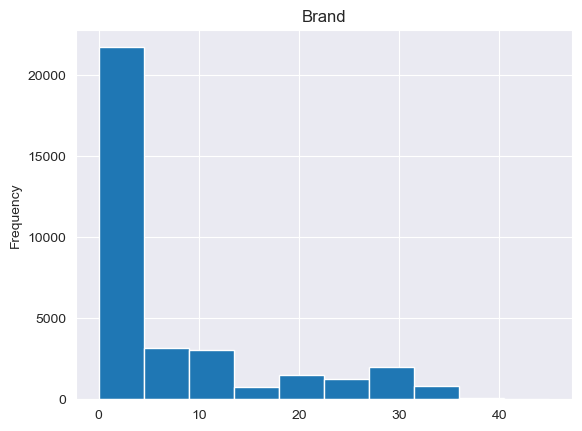

In [28]:
df.Brand.plot(kind='hist')
plt.title(f'Brand')
plt.show()

In [29]:
print(len(df[df.Brand > 32]))

527


Можно заметить, что марки обозначенные за цифры 32-44 практически не встречаются в выборке, а значит их можно удалить.

In [30]:
df = df[df.Brand <= 32]

Проверим на выбросы столбец с клиренсем.

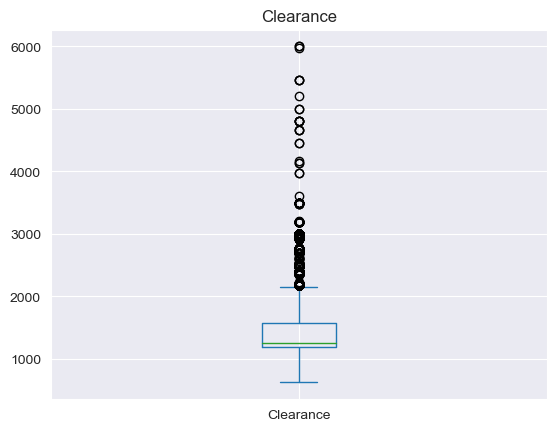

In [31]:
df.Clearance.plot(kind='box')
plt.title(f'Clearance')
plt.show()

In [32]:
print(len(df[df.Clearance > 2000]))
print(len(df[df.Clearance > 2250]))
print(len(df[df.Clearance > 2500]))
print(len(df[df.Clearance > 2750]))
print(len(df[df.Clearance > 3000]))

3330
1546
951
817
90


Записи, где значение клиренса превосходит 3000мм можно удалять, приняв их за выбросы.

In [33]:
df = df[df.Clearance <= 3000]

Проверим столбец с данными о количестве передач.

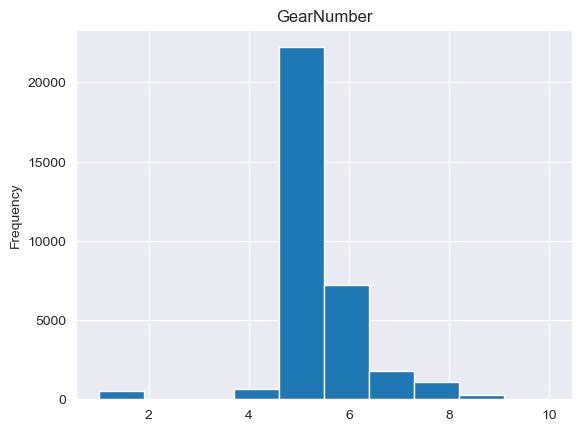

In [34]:
df.GearNumber.plot(kind='hist')
plt.title(f'GearNumber')
plt.show()

In [35]:
print(len(df[df.GearNumber > 8]))

307


В данной выборке совершенно непопулярными оказались автомобили с 9- и 10-ступенчатой коробкой передач, а также автомобили с автоматической трансмиссией.

In [36]:
df = df[(df.GearNumber <= 8) & (df.GearNumber > 1)]

Проверим также данные о типе привода.

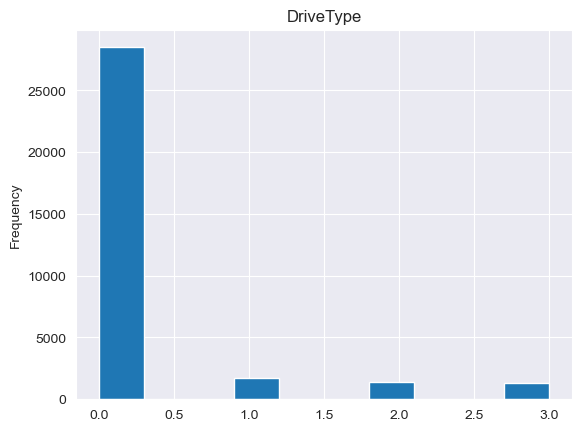

In [37]:
df.DriveType.plot(kind='hist')
plt.title(f'DriveType')
plt.show()

In [38]:
print(len(df[df.DriveType == 1]))
print(len(df[df.DriveType == 2]))
print(len(df[df.DriveType == 3]))

1731
1380
1288


Несмотря на то, что передний привод в разы популярнее других видов, никакие записи в данном случае нельзя принять за выбросы. Поэтому перейдем к проверке количества сидений.

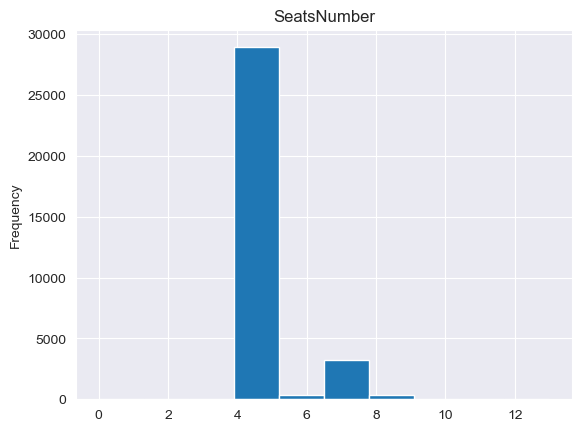

In [39]:
df.SeatsNumber.plot(kind='hist')
plt.title(f'SeatsNumber')
plt.show()

In [40]:
print(len(df[df.SeatsNumber < 5]))
print(len(df[df.SeatsNumber == 5]))
print(len(df[df.SeatsNumber == 6]))
print(len(df[df.SeatsNumber == 7]))
print(len(df[df.SeatsNumber > 7]))


289
28640
383
3246
327


Записи, где количество сидений не равно 5 или 7 можно принять за выбросы.

In [41]:
df = df[(df.SeatsNumber == 5) | (df.SeatsNumber == 7)]

Проверим на выбросы столбец с типов продавца.

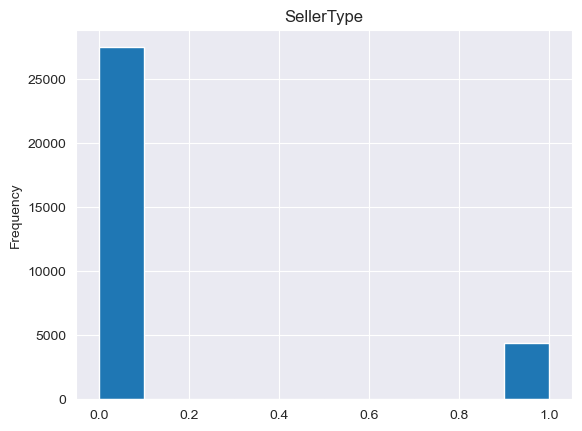

In [42]:
df.SellerType.plot(kind='hist')
plt.title(f'SellerType')
plt.show()

Выбросов не обнаружено, поэтому переходим к количеству цилиндров.

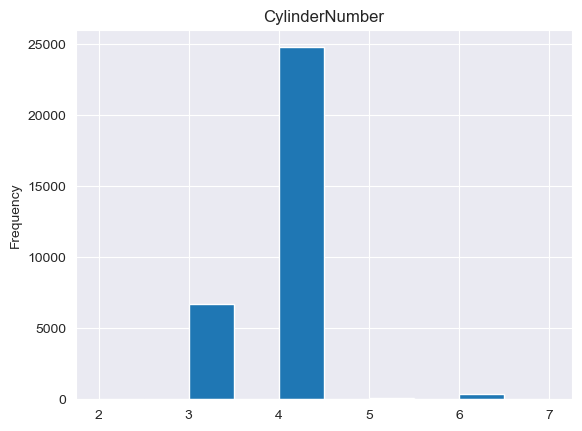

In [43]:
df.CylinderNumber.plot(kind='hist')
plt.title(f'CylinderNumber')
plt.show()

In [44]:
print(len(df[df.CylinderNumber == 0]))
print(len(df[df.CylinderNumber == 1]))
print(len(df[df.CylinderNumber == 2]))
print(len(df[df.CylinderNumber == 3]))
print(len(df[df.CylinderNumber == 4]))
print(len(df[df.CylinderNumber == 5]))
print(len(df[df.CylinderNumber == 6]))
print(len(df[df.CylinderNumber == 7]))

0
0
14
6691
24744
60
352
25


Здесь можно удалить записи, в которых количество цилиндров не равно 3, 4 или 6

In [45]:
df = df[(df.CylinderNumber == 3) | (df.CylinderNumber == 4) | (df.CylinderNumber == 6)]

Далее проверим столбец с количеством клапаном на одном цилиндре.

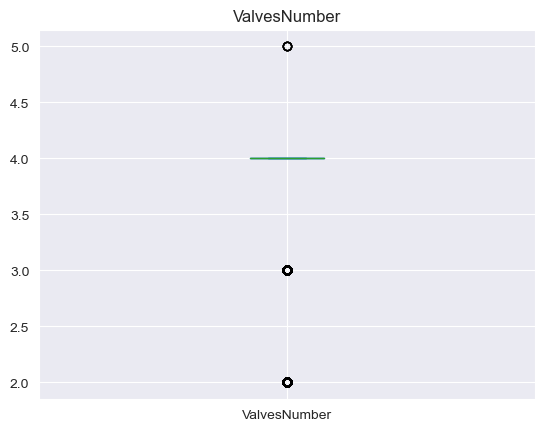

1020
856
29906
5


In [46]:
df.ValvesNumber.plot(kind='box')
plt.title(f'ValvesNumber')
plt.show()
print(len(df[df.ValvesNumber == 2]))
print(len(df[df.ValvesNumber == 3]))
print(len(df[df.ValvesNumber == 4]))
print(len(df[df.ValvesNumber == 5]))

Удалим записи, где количество клапанов не равно 4.

In [47]:
df = df[df.ValvesNumber == 4]

Проверим столбец с наличием турбонаддува.

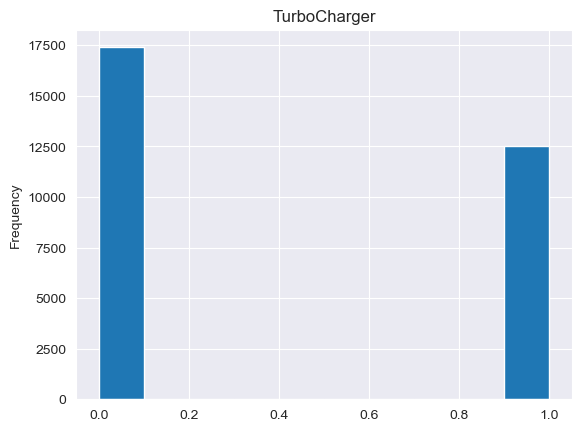

In [48]:
df.TurboCharger.plot(kind='hist')
plt.title(f'TurboCharger')
plt.show()

Здесь выбросов также не обнаружено. 

Последним проверим на выброс столбец с ценами на автомобили.

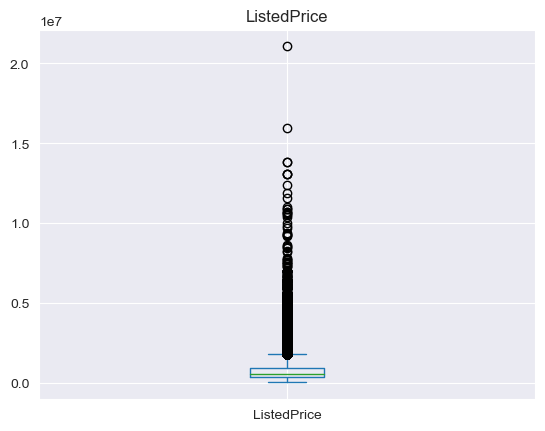

In [49]:
df.ListedPrice.plot(kind='box')
plt.title(f'ListedPrice')
plt.show()

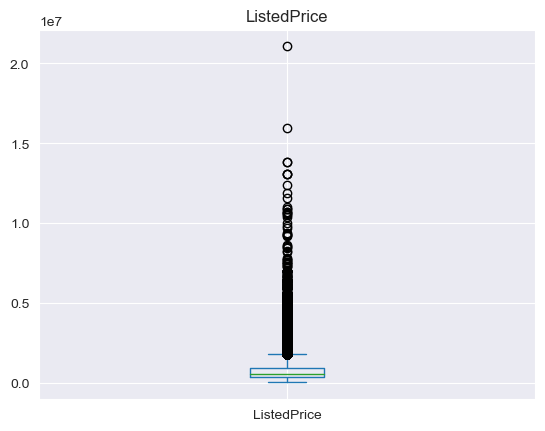

In [50]:
df = df[df.ListedPrice < 1e8]
df.ListedPrice.plot(kind='box')
plt.title(f'ListedPrice')
plt.show()

In [51]:
print(len(df[df.ListedPrice > 0.2e7]))
print(len(df[df.ListedPrice > 0.3e7]))
print(len(df[df.ListedPrice > 0.4e7]))

1747
723
359


Здесь за выбросы можно принять записи, где стоимость автомобиля превышает 3 миллиона рублей.

In [52]:
df = df[df.ListedPrice <= 0.3e7]
len(df)

29183

По итогу чистки выборки от выбросов количество записей сократилось с 37814 до 29183 значений.

Но используемые далее модели не смогут предсказать точную стоимость автомобиля до рубля, поэтому необходимо объединить значения колонки ListedPrice в интервалы и обозначить их так же, как и другие качественные характеристики. Подобно реальному рыночному разделению, автомобили будут разделены на 3 категории: бюджетные (до 1млн рублей), среднего бюджета (1млн-2млн рублей) и дорогие (более 2млн рублей).

In [53]:
df.loc[df['ListedPrice'] <= 1_000_000, 'ListedPrice'] = 0
df.loc[(1_000_000 < df['ListedPrice']) & (df['ListedPrice'] <= 2_000_000), 'ListedPrice'] = 1
df.loc[df['ListedPrice'] > 2_000_000, 'ListedPrice'] = 2

df = df.rename(columns={'ListedPrice': 'PriceCategory'})

## Этап №3. Применение моделей

Для начала необходимо разделить данные на те, по которым будем выдвигаться решение, и те, с которыми это решение будет сравниваться.  

In [54]:
x = df[['ModelYear',
        'BodyType', 
        'TransmissionType',
        'FuelType',
        'KmMileage',
        'Brand', 
        'Clearance', 
        'GearNumber', 
        'DriveType', 
        'SeatsNumber',
        'SellerType',
        'CylinderNumber',
        'ValvesNumber',
        'TurboCharger']]
y = df[['PriceCategory']]

Теперь разделим данные на наборы для обучения и теста. Для обучения будем использовать 75% данных, для тестов - 25%. Также сразу данные необходимо стандартизировать под размеры датафрейма.

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, shuffle=True)

standardise = StandardScaler()
x_train_scale = standardise.fit_transform(x_train)
x_train_scale = pd.DataFrame(x_train_scale)
x_test_scale = standardise.transform(x_test)
x_test_scale = pd.DataFrame(x_test_scale)

### Метод k ближайших соседей

Первой моделью используем метод k ближайших соседей. 
KNN или K-ближайших соседей — это алгоритм классификации, который основывается на близости объектов. Он определяет класс нового объекта, анализируя ближайших к нему соседей и выбирая наиболее часто встречающийся класс среди этих соседей.

Подберем оптимальные гиперпараметры, а именно, количество соседей k с помощью простого перебора, используя встроенную функцию range, подставляя предлагаемые значения в модель.

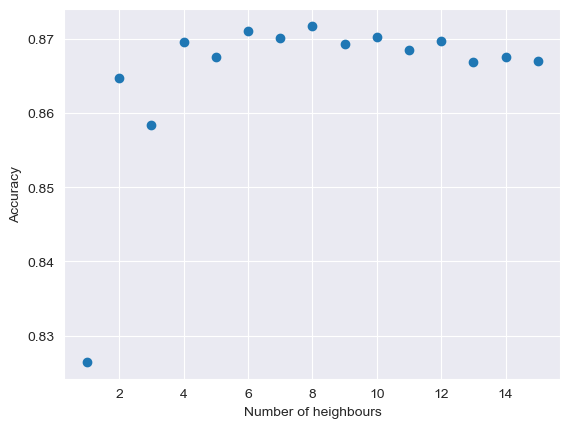

In [56]:
accuracy = []
num_neigh = []

for i in range(1, 16):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train_scale, np.ravel(y_train,order='C'))
    accuracy.append(KNN.score(x_test_scale, y_test))
    num_neigh += [i]

plt.scatter(num_neigh, accuracy)
plt.xlabel('Number of heighbours')
plt.ylabel('Accuracy')
plt.show();  

Для того чтобы модель k ближайших соседей работала оптимально и была готова к переобучению, необходимо взять как можно меньшее количество соседей. Поэтому мы остановимся на значении 4.

In [57]:
KNN = KNeighborsClassifier(n_neighbors=4)
KNN = KNN.fit(x_test_scale,np.ravel(y_test,order='C'))


start_time = time.time()
predict_PriceCategory_KNN = KNN.predict(x_test_scale)
result_KNN = {"RealPriceCategory": list(y_test.PriceCategory), "PredictPriceCategory": list(predict_PriceCategory_KNN)}
result_KNN = pd.DataFrame(result_KNN)
result_KNN["is_True"] = result_KNN["RealPriceCategory"] == result_KNN["PredictPriceCategory"]

end_time = time.time()

KNN_time = end_time - start_time
KNN_train_accuracy = max(accuracy) 
KNN_test_accuracy = sum(result_KNN["is_True"]) / len(result_KNN["is_True"]) 

result_KNN.head()

,RealPriceCategory,PredictPriceCategory,is_True
0,0,0,True
1,0,0,True
2,1,1,True
3,0,0,True
4,0,0,True


### Метод решающих деревьев

Структура дерева представляет собой «листья» и «ветки». На рёбрах («ветках») дерева решения записаны признаки, от которых зависит целевая функция, в «листьях» записаны значения целевой функции, а в остальных узлах — признаки, по которым различаются случаи. Чтобы классифицировать новый случай, надо спуститься по дереву до листа и выдать соответствующее значение. 

Далее подберем гиперпараметры для метода решающих деревьев аналогично предыдущему методу - с помощью перебора.

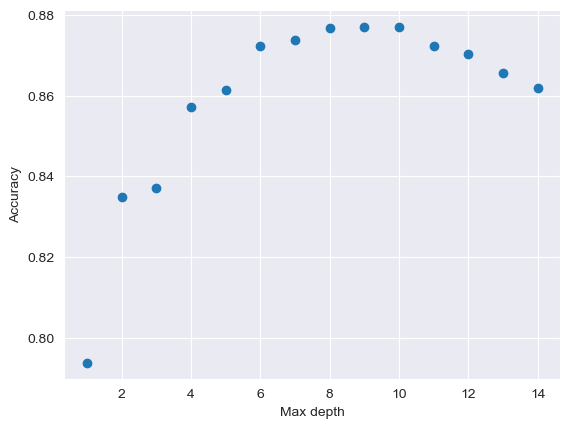

In [58]:
accuracy = []
depth = []

for i in range(1,15):
    DT = DecisionTreeClassifier(max_depth=i)
    DT.fit(x_train_scale, y_train)
    accuracy.append(DT.score(x_test_scale, y_test))
    depth.append(i)

plt.scatter(depth,accuracy)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.show();

В данном случае наоборот - чем больше число глубины, тем легче потом будет переобучать модель. Поэтому остановимся на числе 10.

In [59]:
DT = DecisionTreeClassifier(max_depth=10)
DT = DT.fit(x_test_scale,y_test)


start_time = time.time()
predict_PriceCategory_DT = DT.predict(x_test_scale)
result_DT = {"RealPriceCategory": list(y_test.PriceCategory), "PredictPriceCategory": list(predict_PriceCategory_DT)}
result_DT = pd.DataFrame(result_DT)
result_DT["is_True"] = result_DT["RealPriceCategory"] == result_DT["PredictPriceCategory"]
end_time = time.time()

DT_time = end_time - start_time
DT_train_accuracy = max(accuracy) 
DT_test_accuracy = sum(result_DT["is_True"]) / len(result_DT["is_True"]) 

result_DT.head()

,RealPriceCategory,PredictPriceCategory,is_True
0,0,0,True
1,0,0,True
2,1,1,True
3,0,0,True
4,0,0,True


### Метод случайных лесов

Лес состоит из ансамбля решающих деревьев. Лес создает деревья решений для случайно выбранных семплов данных, получает прогноз от каждого дерева и выбирает наилучшее решение посредством голосования.

Для него подберём гиперпараметры (n_estimators и max_features) с помощью GridSearchCV.

In [60]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid)
grid_search.fit(x_train, np.ravel(y_train,order='C'))
print(grid_search.best_params_) 

In [61]:
RF = RandomForestClassifier(n_estimators=50, max_features=None, max_depth=12)
RF.fit(x_train, np.ravel(y_train,order='C'))

RF_train = RF.predict(x_train)

start_time = time.time()
predict_PriceCategory_RF = RF.predict(x_test)
result_RF = {"RealPriceCategory": list(y_test.PriceCategory), "PredictPriceCategory": list(predict_PriceCategory_RF)}
result_RF = pd.DataFrame(result_RF)
result_RF["is_True"] = result_RF["RealPriceCategory"] == result_RF["PredictPriceCategory"]
end_time = time.time()

RF_time = end_time - start_time
RF_train_accuracy = accuracy_score(y_train, RF_train) 
RF_test_accuracy = accuracy_score(y_test, predict_PriceCategory_RF) 

result_RF.head()

,RealPriceCategory,PredictPriceCategory,is_True
0,0,0,True
1,0,0,True
2,1,1,True
3,0,0,True
4,0,0,True


## Этап №4. Визуализация и конкурентный анализ моделей

Для начала построим матрицы ошибок для всех моделей.

Матрица ошибок для KNN


<Axes: xlabel='PredictPriceCategory', ylabel='RealPriceCategory'>

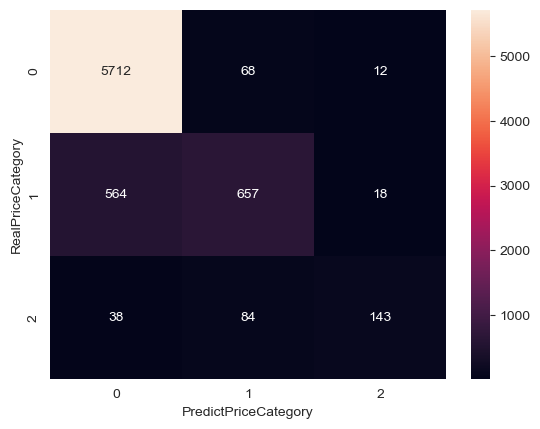

In [62]:
freq = pd.crosstab(result_KNN["RealPriceCategory"], result_KNN["PredictPriceCategory"])
print("Матрица ошибок для KNN")
sns.heatmap(freq,annot=True,fmt="d")

Матрица ошибок для решающих деревьев


<Axes: xlabel='PredictPriceCategory', ylabel='RealPriceCategory'>

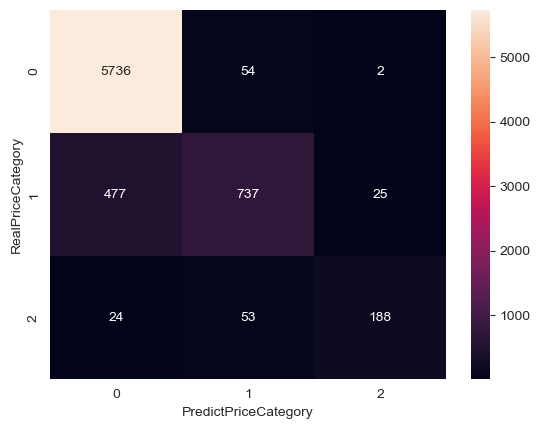

In [63]:
freq = pd.crosstab(result_DT["RealPriceCategory"], result_DT["PredictPriceCategory"])
print("Матрица ошибок для решающих деревьев")
sns.heatmap(freq,annot=True,fmt="d")

Матрица ошибок для случайных лесов


<Axes: xlabel='PredictPriceCategory', ylabel='RealPriceCategory'>

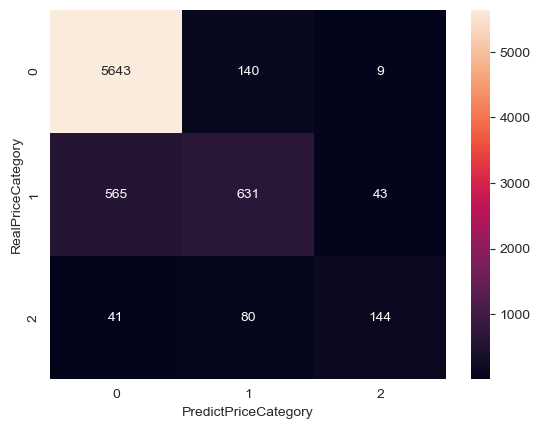

In [64]:
freq = pd.crosstab(result_RF["RealPriceCategory"], result_RF["PredictPriceCategory"])
print("Матрица ошибок для случайных лесов")
sns.heatmap(freq,annot=True,fmt="d")

После работы всех моделей были сохранены метаданные - их точность при обучении и тестах, а также время работы. Приведём все данные в удобный вид и добавим еще несколько оценочных параметров: точность (precision), полноту (recall) и метрику f1. 

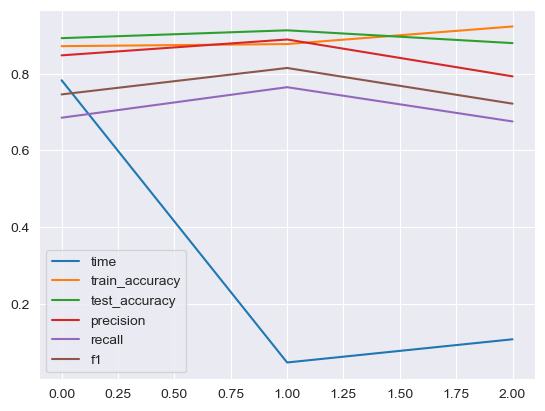

,model,time,train_accuracy,test_accuracy,precision,recall,f1
0,KNN,0.782792,0.871711,0.892544,0.847787,0.685359,0.746078
1,DT,0.047931,0.877193,0.912966,0.889105,0.764867,0.814887
2,RF,0.108331,0.922968,0.879660,0.793066,0.675651,0.721951


In [65]:
time_list = [KNN_time, DT_time, RF_time]
train_accuracy_list = [KNN_train_accuracy, DT_train_accuracy, RF_train_accuracy]
test_accuracy_list = [KNN_test_accuracy, DT_test_accuracy, RF_test_accuracy]

precision_list = [precision_score(y_test, predict_PriceCategory_KNN, average="macro"),
                  precision_score(y_test, predict_PriceCategory_DT, average="macro"),
                  precision_score(y_test, predict_PriceCategory_RF, average="macro")
                  ]
recall_list = [recall_score(y_test, predict_PriceCategory_KNN, average="macro"),
               recall_score(y_test, predict_PriceCategory_DT, average="macro"),
               recall_score(y_test, predict_PriceCategory_RF, average="macro"),
               ]

f1_list = [f1_score(y_test, predict_PriceCategory_KNN, average="macro"),
           f1_score(y_test, predict_PriceCategory_DT, average="macro"),
           f1_score(y_test, predict_PriceCategory_RF, average="macro")
           ]

metrics = {
    "model": ["KNN", "DT", "RF"],
    "time": time_list,
    "train_accuracy": train_accuracy_list,
    "test_accuracy": test_accuracy_list,
    "precision": precision_list,
    "recall": recall_list,
    "f1": f1_list
}
metrics = pd.DataFrame(metrics)

metrics.plot()
plt.show()
metrics

Далее определим наилучшую модель следующим образом: за лучший результат по каждому показателю даётся 3 балла, за второй - 2 балла, за худший - 1 балл.

KNN: 1 + 1 + 2 + 2 + 1 + 2 = 9 
DT: 2 + 2 + 3 + 3 + 3 + 3 = 16
RF: 3 + 3 + 1 + 1 + 2 + 1 = 11

## Выводы 

Метод k - ближайших соседей является одним из простейших методов машинного обучения, однако несмотря на это, он достаточно неплохо справился с поставленной задачей. Случайные леса состоят из ансамбля решающих деревьев, но несмотря на это, имеют худшие показатели эффективности, чем сам метод решающих деревьев. Данный метод превзошел остальные модели практически по всем показателям, что самое главное - по доле верных ответов на тестовом наборе данных. Так что можно с уверенностью утверждать, что решающие деревья наилучшим образом подходят для решения данной задачи.